**NAME: MILONI SHAH**

**SAP ID: 60009210030**

**BATCH: K3**

**Experiment No: 04**

In [ ]:
# Importing Modules
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import math 
import random
from google.colab.patches import cv2_imshow


In [ ]:
# Reading Image
img=cv2.imread('/content/img3.png')



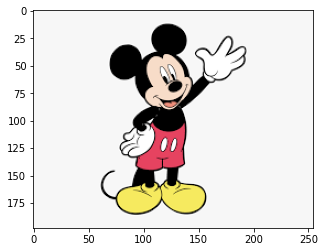

In [ ]:
# Displaying Image
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

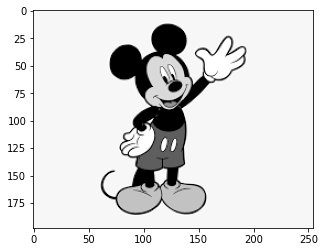

In [ ]:
# Displaying in Gray Scale Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap = "gray")


In [ ]:
# Displaying Shape
x , y = (img.shape)
print(x)
print(y)

198
255


In [ ]:
# Adding some Gausian Noice

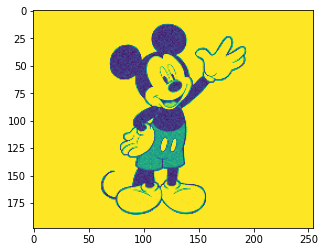

In [ ]:
gn=np.zeros((x , y),dtype=np.uint8)
cv2.randn(gn,150,20)
gn=(gn*0.5).astype(np.uint8)

gaussian_img=cv2.add(img,gn)
plt.imshow(gaussian_img)


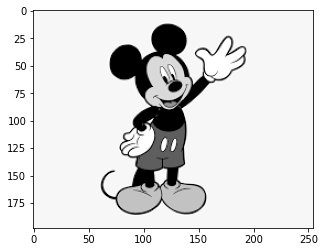

In [ ]:
# Original Image
plt.imshow(img , cmap = "gray")

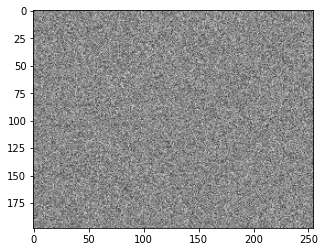

In [ ]:
#Image with noise
plt.imshow(gn,cmap='gray')

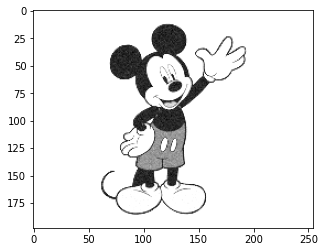

In [ ]:
# Displaying Both
plt.imshow(gaussian_img,cmap='gray')

Text(0.5, 1.0, 'Combined')

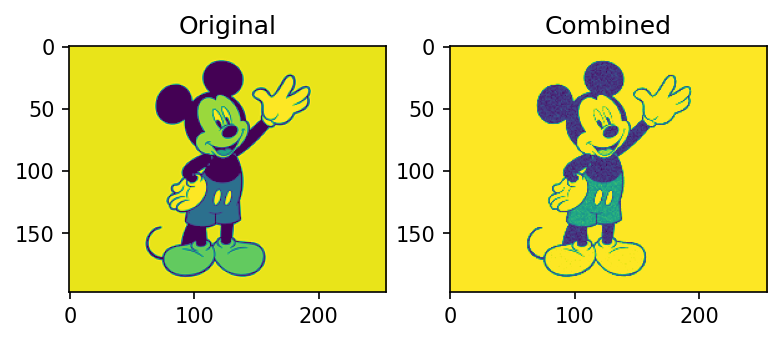

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,2,1)
plt.imshow(img)

plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(gaussian_img)

plt.title("Combined")


Text(0.5, 1.0, 'Combined')

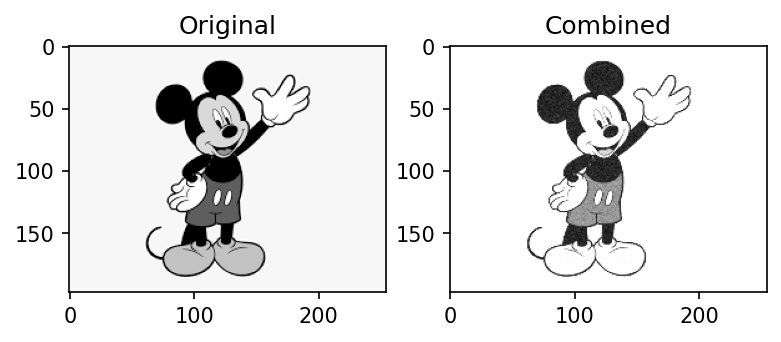

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')

plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(gaussian_img,cmap='gray')

plt.title("Combined")


In [ ]:
# Removing using average filtering
filter = np.ones([3, 3], dtype = int)
filter = filter / 9
avg_filtered = np.zeros([x, y])
for i in range(1, x-1):
  for j in range(1, y-1):
    avg_filtered[i, j]=  (gaussian_img[i-1, j-1]*filter[0, 0] + gaussian_img[i-1, j]*filter[0, 1] +
            gaussian_img[i-1, j + 1]*filter[0, 2] + gaussian_img[i, j-1]*filter[1, 0] +
            gaussian_img[i, j]*filter[1, 1] + gaussian_img[i, j + 1]*filter[1, 2] +
            gaussian_img[i + 1, j-1]*filter[2, 0] + gaussian_img[i + 1, j]*filter[2, 1] +
            gaussian_img[i + 1, j + 1]*filter[2, 2])

avg_filtered = avg_filtered.astype(np.uint8)

Text(0.5, 1.0, 'Denoised Image')

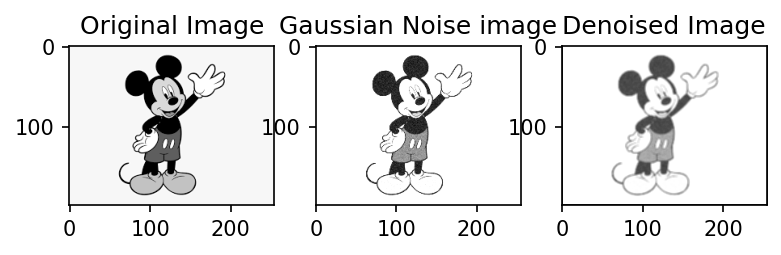

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')

plt.title("Original Image")
fig.add_subplot(1,3,2)
plt.imshow(gaussian_img,cmap='gray')

plt.title("Gaussian Noise image")
fig.add_subplot(1,3,3)
plt.imshow(avg_filtered,cmap='gray')

plt.title("Denoised Image")

In [ ]:
# Salt and Peper Noise 

In [ ]:
sp_img = img.copy()
pixels = random.randint(300, 1000)
for i in range(pixels):
  y_coord=random.randint(0, x - 1)
  x_coord=random.randint(0, y - 1)
  sp_img[y_coord][x_coord] = 255


In [ ]:
pixels = random.randint(300 , 1000)
for i in range(pixels):
  y_coord=random.randint(0, x - 1)
  x_coord=random.randint(0, y - 1)
  sp_img[y_coord][x_coord] = 0

Text(0.5, 1.0, 'Noised image')

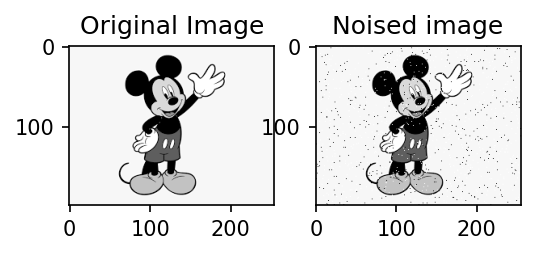

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')

plt.title("Original Image")
fig.add_subplot(1,3,2)
plt.imshow(sp_img,cmap='gray')

plt.title("Noised image")

In [ ]:
# Removing the added Salt and Pepper noise using Median filtering

In [ ]:
median_filter = np.zeros([x, y])


In [ ]:
for i in range(1, x-1):
  for j in range(1, y-1):
    temp = [sp_img[i-1, j-1],
            sp_img[i-1, j],
            sp_img[i-1, j + 1],
            sp_img[i, j-1],
            sp_img[i, j],
            sp_img[i, j + 1],
            sp_img[i + 1, j-1],
            sp_img[i + 1, j],
            sp_img[i + 1, j + 1]]
    temp = sorted(temp)
    median_filter[i, j]= temp[4]
median_filter = median_filter.astype(np.uint8)

Text(0.5, 1.0, 'Denoised image')

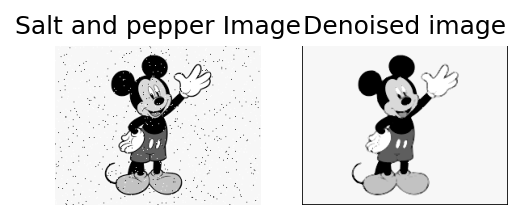

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,3,1)
plt.imshow(sp_img,cmap='gray')
plt.axis("off")
plt.title("Salt and pepper Image")
fig.add_subplot(1,3,2)
plt.imshow(median_filter,cmap='gray')
plt.axis("off")
plt.title("Denoised image")

**Conclusion:**

**i. First I have added gaussian noise and then removed it using Average filtering. Low pass averaging filtering will remove the noise. The output image is blurred.**

**ii. I have added salt and pepper noise and removed it using Median Filter. Median filter is a non-linear filter that helps to remove the noise. The grey level of the centre pixel is replaced by the median filter value of the neighbourhood.**